 ACML: Neural Networks - Backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
#input matrix
X = np.identity(8)
#output matrix
Y=X

In [3]:
n_x = 8 #number of input nodes
n_h = 3 #number of hidden nodes
n_y = 8 #number of output  nodes

In [4]:
#initialising the random weights

W_1 = np.random.randn(n_h,n_x) * 0.01
b_1 = np.zeros((n_h,1))
W_2 = np.random.randn(n_y,n_h) * 0.01
b_2 = np.zeros((n_y,1))

In [5]:
#define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
sigmoid_v = np.vectorize(sigmoid)

In [6]:
W1 = W_1
b1 = b_1
W2 = W_2
b2 = b_2

In [7]:
#forward propogation with random weights

Z1 = np.dot(W_1,X)+b_1
A1 = np.tanh(Z1)
Z2 = np.dot(W_2,A1)+b_2
A2 = sigmoid_v(Z2)

In [8]:
#the the initial cost with random weights
m = Y.shape[1] 
logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
cost = -1/m*np.sum(logprobs)
cost

5.545149759989496

In [9]:
#calculate the gradients

dZ2 = A2-Y
dW2 = 1/m*np.dot(dZ2, A1.T)
db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
dW1 = 1/m*np.dot(dZ1, X.T)
db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)

In [13]:
# cost function vs  learning rates (upto 2000 iterations)

alphacost = np.zeros((10,20))

for j in range(1,11):
    alpha=j/10
    k=0
    start = time.time()
    W1 = W_1
    b1 = b_1
    W2 = W_2
    b2 = b_2
    for i in range(1,2001):
        
        Z1 = np.dot(W1,X)+b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2,A1)+b2
        A2 = sigmoid_v(Z2) 

        dZ2 = A2-Y
        dW2 = 1/m*np.dot(dZ2, A1.T)
        db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
        dW1 = 1/m*np.dot(dZ1, X.T)
        db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)

        W1 = W1 - alpha*dW1
        b1 = b1 - alpha*db1
        W2 = W2 - alpha*dW2
        b2 = b2 - alpha*db2

        if i%100==0:
            logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
            cost = -1/m*np.sum(logprobs)
            alphacost[j-1,k]=cost
            k+=1
             
        i+=1


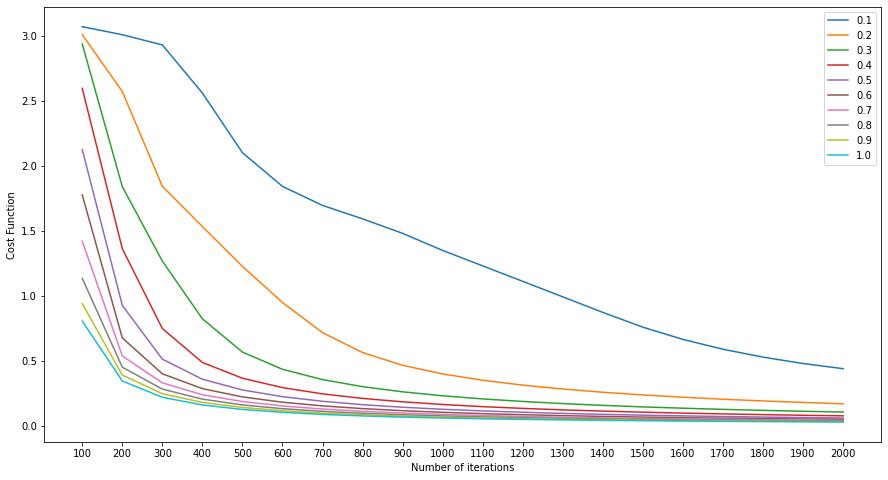

In [14]:
#plot of cost function vs  learning rates

plt.figure(figsize=(15,8))
for i in range(10):
        j=(i+1)/10
        plt.plot(alphacost[i,:],label=j)

plt.xticks(np.arange(0, 20) ,np.arange(100, 2100, step=100))
plt.legend(loc="upper right")
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.show()

In [15]:
#number of iterations for network to converge for different learning rates


tt=[]
for j in range(1,10):
    
    alpha=j/10

    
        
    W1 = W_1
    b1 = b_1
    W2 = W_2
    b2 = b_2
    
    for i in range(1,20000):
        Z1 = np.dot(W1,X)+b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2,A1)+b2
        A2 = sigmoid_v(Z2) 

        dZ2 = A2-Y
        dW2 = 1/m*np.dot(dZ2, A1.T)
        db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
        dW1 = 1/m*np.dot(dZ1, X.T)
        db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)

        W1 = W1 - alpha*dW1
        b1 = b1 - alpha*db1
        W2 = W2 - alpha*dW2
        b2 = b2 - alpha*db2

        if i%100==0:
            logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
            cost = -1/m*np.sum(logprobs)
            if cost<0.05:
                tt.append(i)
                break        


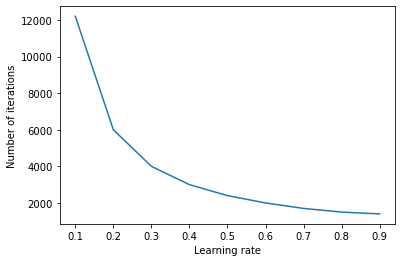

In [16]:
plt.plot(np.arange(0.1,1,0.1),tt)
plt.xlabel("Learning rate")
plt.ylabel("Number of iterations")
plt.show()

In [26]:
#Neural network does not converge when  w1 and w2 parameters are zeros
#Neural Network converges slowly when all parameters in w1 and w2 are equal.

W1 = np.zeros((n_h,n_x)) * 0.01
b1 = np.zeros((n_h,1))
W2 = np.zeros((n_y,n_h)) * 0.01
b2 = np.zeros((n_y,1))

for i in range(1,1001):
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid_v(Z2) 
    
    
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1, X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)
    
    learning_rate=0.5
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    if i%250==0:
        
        logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
        cost = -1/m*np.sum(logprobs)
        print(i,":",cost)
        
    i+=1
    
  

250 : 3.0141612900514945
500 : 3.014161290051494
750 : 3.0141610613615812
1000 : 1.9923220689991912


In [28]:
#Taking an optimum learning rate of learning rate = 0.5 based on the plot,the neural network 
#is trained with 2000 iterations

W1 = W_1
b1 = b_1
W2 = W_2
b2 = b_2

for i in range(1,2001):
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid_v(Z2) 
    
    
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1, X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)
    
    learning_rate=0.5
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    if i%500==0:
        
        logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
        cost = -1/m*np.sum(logprobs)
        print(i,":",cost)
        
    i+=1 
  

500 : 0.2752205807631808
1000 : 0.12660171321308528
1500 : 0.08134258439605427
2000 : 0.059655151166455714


In [30]:
#Initialising the network in a different distribution to study the weights and performance 

W1n = np.random.gamma(0.5,size=(n_h,n_x)) * 0.01
b1n = np.zeros((n_h,1))
W2n = np.random.gamma(0.9,size=(n_y,n_h))*0.01
b2n = np.zeros((n_y,1))

for i in range(1,2001):
    
    Z1 = np.dot(W1n,X)+b1n
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2n,A1)+b2n
    A2 = sigmoid_v(Z2) 
    
    
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1, X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)
    
    learning_rate=0.5
    W1n = W1n - learning_rate*dW1
    b1n = b1n - learning_rate*db1
    W2n = W2n - learning_rate*dW2
    b2n = b2n - learning_rate*db2
    
    if i%500==0:
        
        logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
        cost = -1/m*np.sum(logprobs)
        print(i,":",cost)
        
    i+=1  

500 : 0.22644957786318698
1000 : 0.11601808874830391
1500 : 0.07702149050917581
2000 : 0.05738941892520174


In [31]:
W1

array([[ 1.825, -1.959, -2.081, -1.978, -1.962,  2.245,  1.736,  1.924],
       [ 0.237, -2.416, -1.041,  1.174,  2.405, -0.281, -2.869,  2.793],
       [-2.866,  1.211, -2.284,  2.437, -1.085,  2.732, -0.303,  0.224]])

In [32]:
W1n

array([[ 2.261, -2.352, -2.384, -2.347, -2.33 ,  2.366,  2.239,  2.287],
       [ 0.314, -2.784, -1.095,  1.097,  2.812, -0.294, -3.168,  3.161],
       [-3.155,  1.142, -2.779,  2.815, -1.126,  3.141, -0.306,  0.305]])

In [33]:
W2

array([[ 4.207,  1.756, -7.364],
       [-3.086, -5.167,  4.183],
       [-3.277, -4.261, -5.265],
       [-3.002,  4.309,  5.26 ],
       [-3.093,  5.399, -4.352],
       [ 4.358, -1.782,  6.919],
       [ 4.174, -7.455, -1.936],
       [ 4.32 ,  7.273,  1.659]])

In [34]:
W2n

array([[ 4.255,  2.047, -7.141],
       [-3.103, -5.292,  4.222],
       [-3.144, -4.259, -5.28 ],
       [-3.15 ,  4.277,  5.296],
       [-3.136,  5.308, -4.221],
       [ 4.272, -2.059,  7.144],
       [ 4.233, -7.17 , -2.061],
       [ 4.207,  7.181,  2.051]])

In [35]:
b1

array([[-0.291],
       [ 0.009],
       [ 0.026]])

In [36]:
b1n

array([[-0.28 ],
       [-0.006],
       [ 0.006]])

In [37]:
b2

array([[-8.027],
       [-7.508],
       [-7.604],
       [-7.642],
       [-7.708],
       [-7.972],
       [-8.124],
       [-8.073]])

In [38]:
b2n

array([[-8.223],
       [-7.671],
       [-7.668],
       [-7.71 ],
       [-7.681],
       [-8.285],
       [-8.222],
       [-8.242]])

The trained weights and bias after different initialisations are found to be similar.

In [41]:
#predicting using test values.
test = np.array([[1, 0, 0, 0, 0, 0, 0, 0]]).reshape(8,1)
test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [42]:
Z1 = np.dot(W1,test)+b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1)+b2
A2 = sigmoid_v(Z2) 
A2

array([[0.972],
       [0.   ],
       [0.002],
       [0.   ],
       [0.007],
       [0.   ],
       [0.015],
       [0.017]])

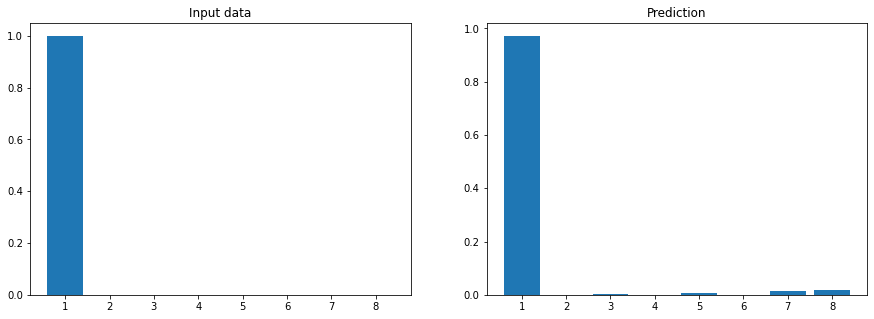

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
inp_num=[1,2,3,4,5,6,7,8]
ax[0].bar(inp_num, test.flatten().tolist())
ax[0].title.set_text('Input data')
ax[1].bar(inp_num, A2.reshape(1,8).flatten().tolist())
ax[1].title.set_text('Prediction')
plt.show()